In [10]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [8]:
# dataset import
df = pd.read_csv('Position_Salaries.csv')
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [9]:
# Linear regression on the whole dataset instead of train test split
lg = LinearRegression()
lg.fit(x, y)

LinearRegression()

In [11]:
# Training the poly model on the entire dataset
poly = PolynomialFeatures(degree=4)
x_poly = poly.fit_transform(x)
lg2 = LinearRegression()
lg2.fit(x_poly, y)

LinearRegression()

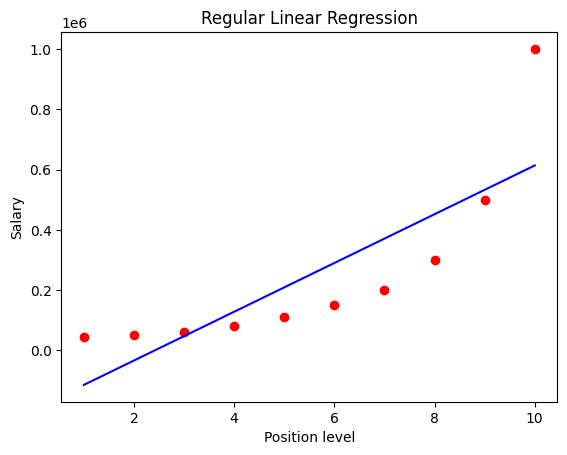

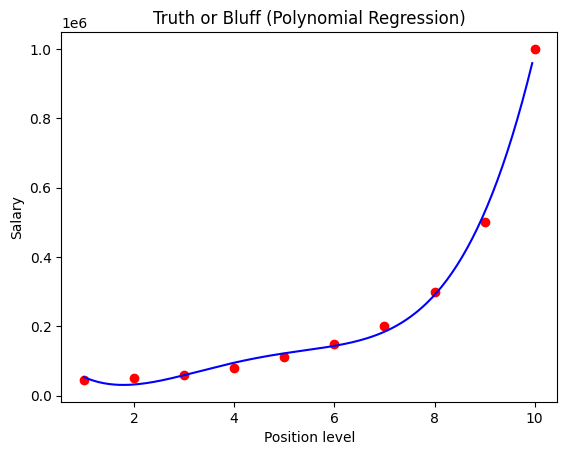

In [20]:
# Visualization of both
plt.scatter(x, y, color='red')
plt.plot(x, lg.predict(x), color='blue')
plt.title("Regular Linear Regression")
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

x_grid = np.arange(min(x), max(x), 0.05)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(x_grid, lg2.predict(poly.fit_transform(x_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [22]:
# From here on out, prediction happens with individual values.

# Regular Linear Regression:
print(lg.predict([[6.5]]))

# Polynomial Regression
print(lg2.predict(poly.fit_transform([[6.5]])))

[330378.78787879]
[158862.45265155]
